In [12]:
#HEART ATTACK ANALYSIS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [13]:
# Load the dataset
df = pd.read_csv("Heart_Attack_Analysis_Data.csv")

In [14]:
# Display 5 rows
display(df.head())

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngia,FamilyHistory,Target
0,63.0,1,3.0,145.0,233.0,1,0,150,0.0,2,1
1,37.0,1,2.0,NaN,250.0,0,1,187,0.0,1,1
2,41.0,0,1.0,130.0,204.0,0,0,172,0.0,0,1
3,56.0,1,1.0,120.0,236.0,0,1,178,0.0,1,1
4,57.0,0,0.0,120.0,354.0,0,1,163,1.0,0,1


In [15]:
# Dataset shape & description
print(df.describe())
print(df.shape)
print(df.info())

              Age         Sex     CP_Type  BloodPressure  Cholestrol  \
count  302.000000  303.000000  302.000000     302.000000  302.000000   
mean    54.327815    0.683168    0.970199     131.629139  246.420530   
std      9.072346    0.466011    1.032257      17.567002   51.845015   
min     29.000000    0.000000    0.000000      94.000000  126.000000   
25%     47.250000    0.000000    0.000000     120.000000  211.000000   
50%     55.000000    1.000000    1.000000     130.000000  240.500000   
75%     61.000000    1.000000    2.000000     140.000000  274.750000   
max     77.000000    1.000000    3.000000     200.000000  564.000000   

       BloodSugar         ECG  MaxHeartRate  ExerciseAngia  FamilyHistory  \
count  303.000000  303.000000    303.000000     302.000000     303.000000   
mean     0.148515    0.528053    149.646865       0.327815       1.204620   
std      0.356198    0.525860     22.905161       0.470196       1.096825   
min      0.000000    0.000000     71.000000

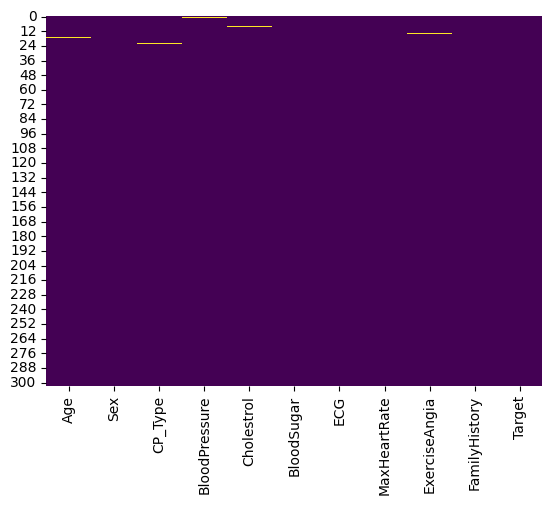

In [16]:
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [10]:
# Handle missing values (if any)
df.dropna(inplace=True)

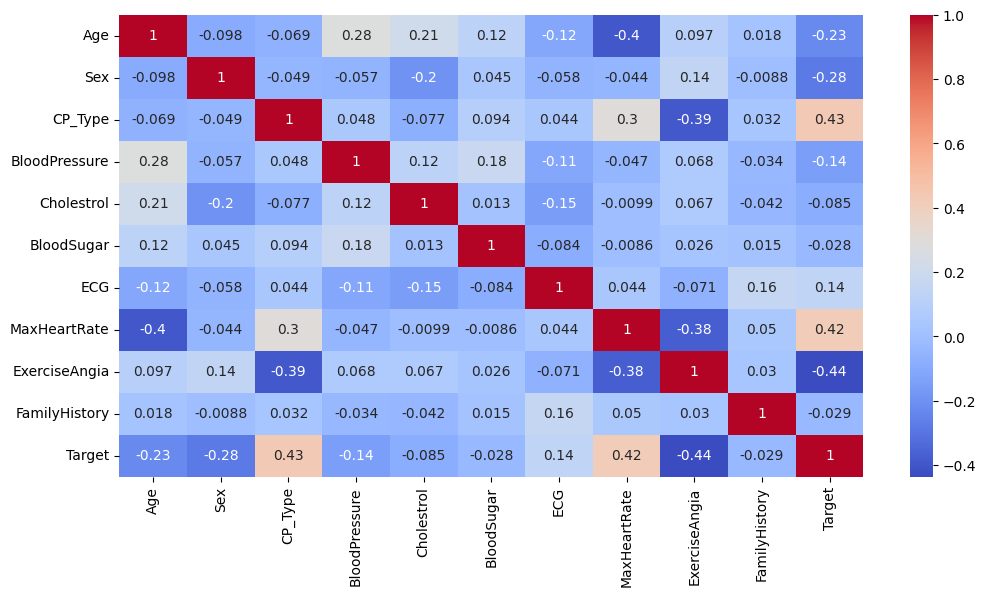

In [11]:
# Correlation analysis
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.show()

In [12]:
# Feature selection based on correlation (dropping highly correlated features if necessary)
# Perform standardization or normalization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_scaled["Target"] = df["Target"]

In [13]:
# Train-test split
X = df_scaled.drop("Target", axis=1)
y = df_scaled["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [15]:
# Model 2: Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [16]:
# Performance Evaluation
def evaluate_model(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("-" * 50)

In [17]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")

Model: Logistic Regression
Accuracy: 0.8524590163934426
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

Confusion Matrix:
 [[26  3]
 [ 6 26]]
ROC AUC Score: 0.8545258620689655
--------------------------------------------------
Model: Decision Tree
Accuracy: 0.7540983606557377
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.79      0.72      0.75        32

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61

Confusion Matrix:
 [[23  6]
 [ 9 23]]
ROC AUC Score: 0.75592672413793

In [18]:
# Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", grid_search.best_params_)


Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
